### Importando Bibliotecas

In [72]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

### Carregando Base de Ddados

In [52]:
#Importando as base de dados
#Dataframe de treinamento
dados = pd.read_csv('train.csv')

In [53]:
#Vendo as 5 primeiras linhas do df_treino
dados.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [54]:
#Estatísticas
dados.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [55]:
#Verificando valores nulos
dados.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Manipulação de Dados

In [56]:
#Adicionando uma nova coluna e renomeando 
dados.insert(1, 'day', '')
dados.insert(2, 'hours', '')

dados = dados.rename(columns = {'datetime': 'date'})
dados.head()

,date,day,hours,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,,,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,,,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,,,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,,,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,,,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [57]:
#Separando data de hora
aux_0 = dados['date'].unique()
day = 1

for x in range(len(dados)):
    #Extraindo data
    aux_1 = aux_0[x-1]
    date = aux_1[0:10]

    dados.at[x, 'date'] = date

    #Extraindo hora
    aux_1 = aux_0[x]
    hours = aux_1[10:13]

    dados.at[x, 'hours'] = hours

    #Adicionando os dias decorridos
    if int(hours) == 1:
        day = day + 1
        
    dados.at[x, 'day'] = day

In [58]:
#Adicionando colunas com indicadores
df_treino = pd.get_dummies(dados, columns = ['holiday', 'workingday', 'season', 'weather'], prefix = ['holiday', 'workingday', 'season', 'weather'])

In [59]:
#Visualizando o dataframe alterado
df_treino.head()

,date,day,hours,temp,atemp,humidity,windspeed,casual,registered,count,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2012-12-19,1,00,9.84,14.395,81,0.0,3,13,16,...,1,0,1,0,0,0,1,0,0,0
1,2011-01-01,2,01,9.02,13.635,80,0.0,8,32,40,...,1,0,1,0,0,0,1,0,0,0
2,2011-01-01,2,02,9.02,13.635,80,0.0,5,27,32,...,1,0,1,0,0,0,1,0,0,0
3,2011-01-01,2,03,9.84,14.395,75,0.0,3,10,13,...,1,0,1,0,0,0,1,0,0,0
4,2011-01-01,2,04,9.84,14.395,75,0.0,0,1,1,...,1,0,1,0,0,0,1,0,0,0


### Análise de Dados

<BarContainer object of 7 artists>

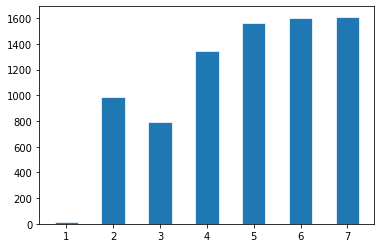

In [60]:
#Gráfico das bikes alugadas num período de 7 dias
x_graph_1 = []
y_graph_1 = []

for x in range(7):
    x_graph_1.append(x+1)

    aux_0 = dados.query('day == {}'.format(x+1))
    y_graph_1.append(aux_0['count'].sum())

plt.bar(x_graph_1, y_graph_1, width=0.5, edgecolor="white", linewidth=0.7)

<function matplotlib.pyplot.show(close=None, block=None)>

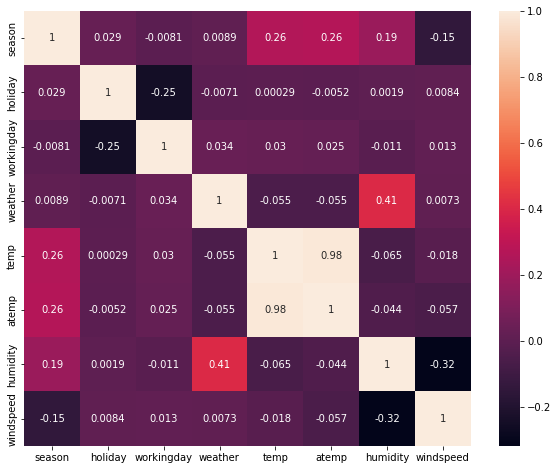

In [61]:
#Matriz de correlação - Passando todas as features
plt.figure(figsize = (10,8))
sns.heatmap(dados.drop(columns = ['date', 'count', 'casual', 'registered']).corr(method = 'pearson'), annot = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

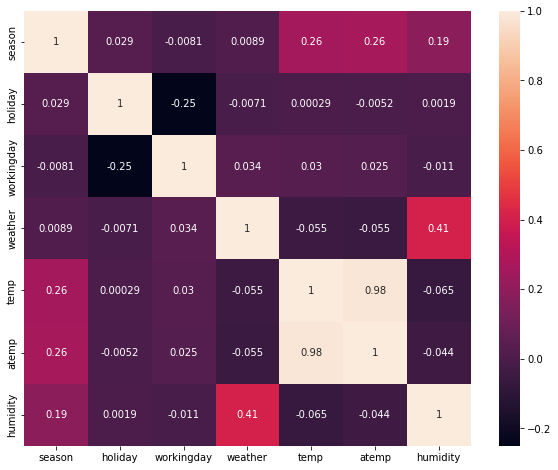

In [62]:
#Matriz de correlação - Passando as features com uma boa correlação
plt.figure(figsize = (10,8))
sns.heatmap(dados.drop(columns = ['date', 'count', 'windspeed', 'casual', 'registered']).corr(method = 'pearson'), annot = True)
plt.show

### Organização das Features

In [79]:
X = df_treino.drop(columns = ['date', 'windspeed', 'count'])
X.shape

(10886, 19)

In [64]:
X.head()

,day,hours,temp,atemp,humidity,holiday_0,holiday_1,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,00,9.84,14.395,81,1,0,1,0,1,0,0,0,1,0,0,0
1,2,01,9.02,13.635,80,1,0,1,0,1,0,0,0,1,0,0,0
2,2,02,9.02,13.635,80,1,0,1,0,1,0,0,0,1,0,0,0
3,2,03,9.84,14.395,75,1,0,1,0,1,0,0,0,1,0,0,0
4,2,04,9.84,14.395,75,1,0,1,0,1,0,0,0,1,0,0,0


In [80]:
y = df_treino['count']
y.shape

(10886,)

### Cross Validation - KFOLD

In [74]:
clf = DecisionTreeClassifier()

In [81]:
scores = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')

C:\Users\tonny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [82]:
scores

array([0.29017447, 0.25677538, 0.28387689, 0.31005972, 0.2733119 ])